# preprocess

In [43]:
import librosa
import pyworld as pw
import scipy
import numpy as np
from PIL import Image
from pathlib import Path
from joblib import Parallel,delayed
from sklearn.preprocessing import normalize
import pickle
from IPython import embed
from tqdm import tqdm_notebook as tqdm
import IPython.display
import matplotlib.pyplot as plt

import util


In [22]:
path=Path("D:/bulk/dataset/audio/Anonymous-VC")
path_raw =                  path/"10_raw_yuduki-yukari"
path_prep_original =        path/"21_prep_original"
path_prep_original_10sec =  path/"22_prep_original_10sec"
path_prep_anonymous =       path/"31_prep_anonymous"
path_prep_anonymous_10sec = path/"32_prep_anonymous_10sec"
print(path)


D:\bulk\dataset\audio\Anonymous-VC


In [41]:
# reference : https://qiita.com/Yuhsak/items/1e8533343cf5458e2e08#joblib%E3%81%A7%E4%B8%A6%E5%88%97%E5%8C%96%E3%81%99%E3%82%8B
def preprocess_input(p:Path):
    src ,fs= librosa.load(p.resolve(), sr=util.conf.sample_ratio)
    if  util.conf.prep_audio_dataset_second is not None:
        src = util.clip_audio_length(src,fs,second=util.conf.prep_audio_dataset_second)

    # preprocess src audio
    src_abs, src_phase = util.convert_to_spectrogram(src)
    src_abs ,src_phase = util.padding_spectrogram(src_abs), util.padding_spectrogram(src_phase)
    src_abs,_scale_factor,_offset= util.normalize(src_abs)
    src_phase,_scale_factor,_offset= util.normalize(src_phase)
    
    # preprocess anonymized audio
    anonymized = util.anonymization(fs, src)
    anonymized_abs, anonymized_phase = util.convert_to_spectrogram(anonymized)
    anonymized_abs, anonymized_phase = util.padding_spectrogram(anonymized_abs), util.padding_spectrogram(anonymized_phase)
    anonymized_abs,_scale_factor,_offset= util.normalize(anonymized_abs)
    anonymized_phase,_scale_factor,_offset= util.normalize(anonymized_phase)
    
#     with open(path_prep_original_10sec/(p.name+".pkl"),'wb') as f:
#         pickle.dump(np.array([src_abs,src_phase]),f)
#     with open(path_prep_anonymous_10sec/(p.name+".pkl"),'wb') as f:
#         pickle.dump(np.array([anonymized_abs,anonymized_phase]),f)
    util.save_spectrogram_asImage(src_abs,src_phase,path_prep_original_10sec/(p.name+"_image.png"))
    util.save_spectrogram_asImage(anonymized_abs,anonymized_phase,path_prep_anonymous_10sec/(p.name+"_image.png"))

    print("processed {}".format(p.name+".pkl"))
    return src_abs, src_phase, anonymized_abs, anonymized_phase


C:\Users\Chilly.Ice-desktop\Anaconda3\envs\py36-audio\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


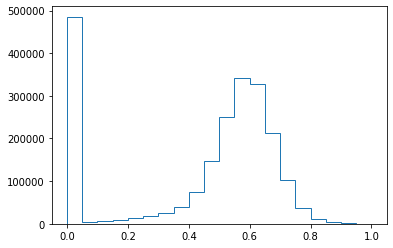

C:\Users\Chilly.Ice-desktop\Anaconda3\envs\py36-audio\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


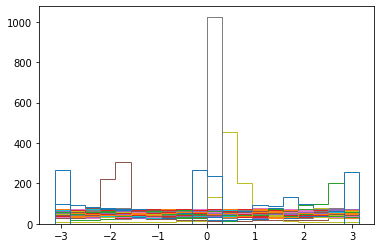

In [36]:
# p = list(path_raw.glob("**/*.wav"))[0]
# src ,fs= librosa.load(p.resolve(), sr=util.conf.sample_ratio)
# D = librosa.stft(src, n_fft=2048)  #D:np.ndarray [shape=(1 + n_fft/2, t), dtype=dtype]
# Dabs = np.log10(np.abs(D) + 10**-6)
# Dabs = util.normalize(Dabs)
# Dphase = np.angle(D)

# n, bins, patches = plt.hist(Dabs, 20, 
#                             weights=None, normed=False,
#                             histtype="step", log=False)
# plt.show()
# n, bins, patches = plt.hist(Dphase, 20, 
#                             weights=None, normed=False,
#                             histtype="step", log=False)
# plt.show()


processed ATR503_001.wav.pkl


C:\Users\Chilly.Ice-desktop\Anaconda3\envs\py36-audio\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


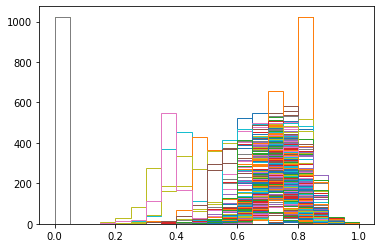

In [24]:
# try to preprocess 1 audio file.
p = list(path_raw.glob("**/*.wav"))[0]
src_abs, src_phase, anonymized_abs, anonymized_phase = preprocess_input(p)

nsa,*_ = util.normalize(src_abs)
nsp,*_ = util.normalize(src_phase)
util.save_spectrogram_asImage(nsa,nsp,path_prep_original_10sec/(p.name+"_image.png"))
naa,*_ = util.normalize(anonymized_abs)
nap,*_ = util.normalize(anonymized_phase)
util.save_spectrogram_asImage(naa,nap,path_prep_anonymous_10sec/(p.name+"_image.png"))

n, bins, patches = plt.hist(nsa, 20, 
                            weights=None, normed=False,
                            histtype="step", log=False)
plt.show()


In [48]:
# Parallel(n_jobs=-1)( [delayed(preprocess_input)(p) for p in tqdm(path_raw.glob("**/*.wav"))] )
Parallel(n_jobs=-1)( [delayed(preprocess_input)(p) for p in tqdm(list(path_raw.glob("**/*.wav"))[0:10])] )

[(array([[0.6566476 , 0.6235364 , 0.4661854 , ..., 0.7571545 , 0.7571545 ,
          0.7571545 ],
         [0.648422  , 0.6146019 , 0.54952765, ..., 0.7571545 , 0.7571545 ,
          0.7571545 ],
         [0.63934016, 0.59229314, 0.549362  , ..., 0.7571545 , 0.7571545 ,
          0.7571545 ],
         ...,
         [0.43304607, 0.39897537, 0.29077098, ..., 0.7571545 , 0.7571545 ,
          0.7571545 ],
         [0.4334908 , 0.39272457, 0.25718483, ..., 0.7571545 , 0.7571545 ,
          0.7571545 ],
         [0.4339121 , 0.39782262, 0.22650212, ..., 0.7571545 , 0.7571545 ,
          0.7571545 ]], dtype=float32),
  array([[0.5       , 0.5       , 1.        , ..., 0.5       , 0.5       ,
          0.5       ],
         [1.        , 0.20094839, 0.32627964, ..., 0.5       , 0.5       ,
          0.5       ],
         [0.5       , 0.0012002 , 0.8260235 , ..., 0.5       , 0.5       ,
          0.5       ],
         ...,
         [0.5       , 0.747715  , 0.86390346, ..., 0.5       , 0.5       

# pre-train generator

In [5]:
bs=4

In [6]:
import fastai
from fastai.vision import *
from fastai.vision.data import *
from fastai.callbacks import *
from fastai.utils.mem import *
from torchvision.models import resnet18

In [8]:
def open_from_pickle(self, fn):
    """
    used instead of ImageList#open()  
    reference : https://github.com/fastai/fastai/blob/1.0.57/fastai/vision/data.py#L267
    
    Returns:
      The image in RGB format as numpy array of floats normalized to range between 0.0 - 1.0
    """
    with open(fn,"rb") as f:
        return pickle.load(f)

def data_open_image_from_pickle(fn:PathOrStr, div:bool=True, convert_mode:str='RGB', cls:type=Image,
         after_open:Callable=None)->Image:
    """
    used instead of vision.data.open_image
    reference : https://github.com/fastai/fastai/blob/1.0.57/fastai/vision/data.py#L267
    
    Returns:
      The image in RGB format as numpy array of floats normalized to range between 0.0 - 1.0
    """
    with open(fn,"rb") as f:
        return pickle.load(f)

def image_open_image_from_pickle(fn:PathOrStr, div:bool=True, convert_mode:str='RGB', cls:type=Image,
        after_open:Callable=None)->Image:
    """
    used instead of vision.data.open_image
    reference : https://github.com/fastai/fastai/blob/1.0.57/fastai/vision/data.py#L267
    
    Returns:
      The image in RGB format as numpy array of floats normalized to range between 0.0 - 1.0
    """
    with open(fn,"rb") as f:
        return pickle.load(f)

# ImageList.open = open_from_pickle  # 画像はpickle形式のためopenメソッドの書き換え
# ImageImageList.open = open_from_pickle
# fastai.vision.data.open_image = open_image_from_pickle
print(vision.data.open_image.__repr__(), vision.image.open_image.__repr__())
vision.data.open_image= data_open_image_from_pickle
vision.image.open_image= image_open_image_from_pickle
print(vision.data.open_image.__repr__(), vision.image.open_image.__repr__())


<function open_image at 0x000001D137865598> <function open_image at 0x000001D137865598>
<function data_open_image_from_pickle at 0x000001D1379B2BF8> <function image_open_image_from_pickle at 0x000001D1379B2AE8>


In [9]:
print(vision.data.open_image.__repr__(), vision.image.open_image.__repr__())


<function data_open_image_from_pickle at 0x000001D1379B2BF8> <function image_open_image_from_pickle at 0x000001D1379B2AE8>


In [10]:
def get_data(bs):
    src = ImageImageList.from_folder(path_prep_original_10sec,extensions=[".pkl"]) \
            .split_by_rand_pct(0.1, seed=42)
    data = (src.label_from_func(lambda x: path_prep_anonymous_10sec/x.name)) \
        .databunch(bs=bs)

#            .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
#             .normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data

In [ ]:
src = ImageImageList.from_folder(path_prep_original_10sec,extensions=[".pkl"]) \
              .split_by_rand_pct(0.1, seed=42)
src
# ImageImageList.open = open_from_pickle  # 画像はpickle形式のためopenメソッドの書き換え

In [13]:
data_gen = get_data(bs)

In [14]:
data_gen.show_batch(4)

OSError: Traceback (most recent call last):
  File "C:\Users\Chilly.Ice-desktop\Anaconda3\envs\py36-audio\lib\site-packages\torch\utils\data\dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "C:\Users\Chilly.Ice-desktop\Anaconda3\envs\py36-audio\lib\site-packages\torch\utils\data\dataloader.py", line 138, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "C:\Users\Chilly.Ice-desktop\Anaconda3\envs\py36-audio\lib\site-packages\fastai\data_block.py", line 648, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "C:\Users\Chilly.Ice-desktop\Anaconda3\envs\py36-audio\lib\site-packages\fastai\data_block.py", line 118, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "C:\Users\Chilly.Ice-desktop\Anaconda3\envs\py36-audio\lib\site-packages\fastai\vision\data.py", line 271, in get
    res = self.open(fn)
  File "C:\Users\Chilly.Ice-desktop\Anaconda3\envs\py36-audio\lib\site-packages\fastai\vision\data.py", line 267, in open
    return open_image(fn, convert_mode=self.convert_mode, after_open=self.after_open)
  File "C:\Users\Chilly.Ice-desktop\Anaconda3\envs\py36-audio\lib\site-packages\fastai\vision\image.py", line 393, in open_image
    x = PIL.Image.open(fn).convert(convert_mode)
  File "C:\Users\Chilly.Ice-desktop\Anaconda3\envs\py36-audio\lib\site-packages\PIL\Image.py", line 2822, in open
    raise IOError("cannot identify image file %r" % (filename if filename else fp))
OSError: cannot identify image file 'D:\\bulk\\dataset\\audio\\Anonymous-VC\\22_prep_original_10sec\\ATR503_039.wav.pkl'


# postprocess

In [49]:
def postprocess(Dabs,Dphase):
    Dabs = util.denormalize(Dabs)
    Dphase = util.denormalize(Dphase)
    y_hat = util.convert_to_wave(Dabs,Dphase)
    return y_hat

In [50]:
# check preprocessed audio
print("original")
IPython.display.display(IPython.display.Audio(p))

print("restored")
src_hat = postprocess(src_abs,src_phase)
IPython.display.display(IPython.display.Audio(src_hat, rate=util.conf.sample_ratio))

print("anonymized")
anonymized_hat = postprocess(anonymized_abs,anonymized_phase)
IPython.display.display(IPython.display.Audio(anonymized_hat, rate=util.conf.sample_ratio))


original


restored


anonymized
